In [1]:
import tensorflow_datasets as tfds


In [2]:
data=tfds.load(name="imdb_reviews",split=["train","test"],as_supervised=True);


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteXD57CG/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteXD57CG/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteXD57CG/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
train_data,test_data=data

In [4]:
msg=f"""{len(train_data)} {len(test_data)} """
msg

'25000 25000 '

In [5]:
data=tfds.load(name="imdb_reviews",split=["train[:60%]","train[60%:]","test"],as_supervised=True);


In [6]:
train_data,valid_data,test_data=data

In [7]:
msg=f"""
 train_data: {len(train_data)} 
 valid_data: {len(valid_data)} 
 test_data :  {len(test_data)} 
"""
msg

'\n train_data: 15000 \n valid_data: 10000 \n test_data :  25000 \n'

In [8]:
x=train_data.batch(100)
len(x)

150

In [9]:
x_inputs,x_lables=next(iter(x))
x_lables

<tf.Tensor: shape=(100,), dtype=int64, numpy=
array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1])>

In [10]:
for i in x_inputs[:3]:
    print(i)
    print("*"*40)

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
****************************************
tf.Tensor(b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However

In [11]:
import tensorflow_hub as hub
import tensorflow as tf

In [12]:
url="https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"

In [13]:
hube=hub.KerasLayer(url,input_shape=[],trainable=True,dtype=tf.string)

In [14]:
model=tf.keras.Sequential()
model.add(hube)
model.add(tf.keras.layers.Dense(16,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 20)                400020    
                                                                 
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",
            metrics=["accuracy"])

In [26]:
history=model.fit(
        train_data.shuffle(10000).batch(512),
        epochs=20,
        validation_data=valid_data.batch(512),
        verbose=1)

Epoch 1/20
30/30 [==============================] - 4s 78ms/step - loss: 0.8004 - accuracy: 0.5231 - val_loss: 0.7097 - val_accuracy: 0.5756
Epoch 2/20
30/30 [==============================] - 2s 62ms/step - loss: 0.6607 - accuracy: 0.6188 - val_loss: 0.6310 - val_accuracy: 0.6551
Epoch 3/20
30/30 [==============================] - 2s 62ms/step - loss: 0.5962 - accuracy: 0.6862 - val_loss: 0.5770 - val_accuracy: 0.7030
Epoch 4/20
30/30 [==============================] - 2s 62ms/step - loss: 0.5424 - accuracy: 0.7364 - val_loss: 0.5307 - val_accuracy: 0.7420
Epoch 5/20
30/30 [==============================] - 2s 61ms/step - loss: 0.4938 - accuracy: 0.7722 - val_loss: 0.4927 - val_accuracy: 0.7686
Epoch 6/20
30/30 [==============================] - 2s 61ms/step - loss: 0.4533 - accuracy: 0.7984 - val_loss: 0.4587 - val_accuracy: 0.7881
Epoch 7/20
30/30 [==============================] - 2s 62ms/step - loss: 0.4159 - accuracy: 0.8215 - val_loss: 0.4326 - val_accuracy: 0.8082
Epoch 8/20
30

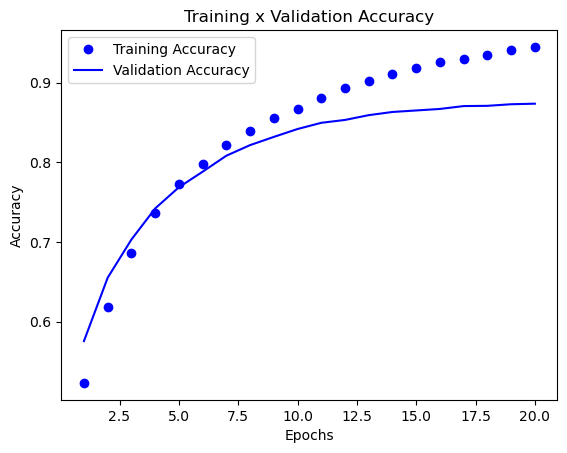

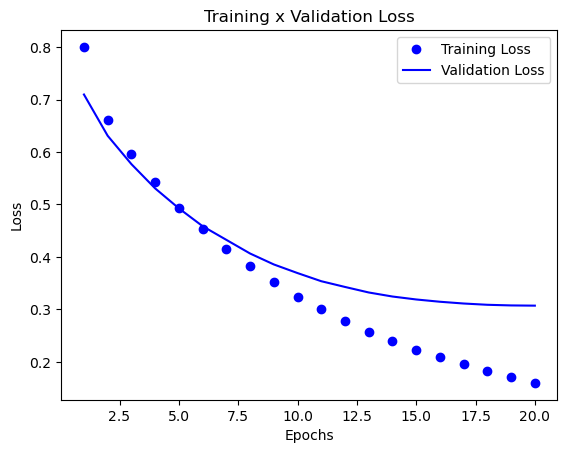

In [28]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training x Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training x Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [29]:
results = model.evaluate(train_data.batch(512), verbose=0)
for name , value in zip(model.metrics_names,results):
    print("%s: %.5f"%(name,value))

loss: 0.15074
accuracy: 0.95113
